In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadData(filename, sep, header): #data loader using pandas
    df = pd.read_table(filename,sep=sep,header=header)
    df = df.fillna(df.mean()) #set NaN values to mean
    return np.array(df) #convert to a numpy array (matrix)

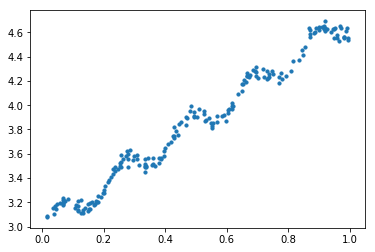

In [3]:
data = loadData('ex0.txt',sep='\t',header=None) #delimiter is Tab, no header
data = np.mat(data) #today, we utilize matrix type
xMat = data[:,0].T  #column-wise
yMat = data[:,1]
fig = plt.figure()
plt.scatter(xMat.A[0], yMat.T.A[0], s=10)
plt.show()

Exercise 1: implement Ridge regression with gradient descent

In [4]:
def appendBias(X):
    return np.vstack((X, np.ones(X.shape[1])))

def ridgeRegres(xArr,yArr, gamma):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    d,n = xMat.shape
    maxEpochs = 1000
    alpha = 0.0001

    ws = np.random.randn(d,1)   #initialize weights
    for k in range(maxEpochs):
        yHat = xMat.T*ws
        error = (yArr - yHat)     
        ws = ws - (- alpha * xMat * error + gamma*ws) 
        
        ### This is a BAD example! Use matrix operation.
        #diffLoss = np.mat(np.zeros((d,1)))
        #for i in range(n):
        #    diffLoss += float(yArr[i] - yHat[i])*xMat[:,i]
        #ws = ws + alpha * diffLoss - gamma*ws  #matrix mult
        
    return ws

In [5]:
xMat_b = appendBias(xMat)  #xMat with bias 
w = ridgeRegres(xMat_b,yMat, 0.0001)
print(w)

[[ 1.78700849]
 [ 2.94425528]]


Exercise 2: implement LASSO with coordinate gradient descent

In [6]:
data = loadData('abalone.txt',sep='\t', header=None)
xMat = np.mat(data[:,:8]).T
yMat = np.mat(data[:,8]).T
xMat_b = appendBias(xMat)  #xMat with bias 

In [7]:
def lassoRegres(xArr,yArr, gamma):
    xMat = np.mat(xArr)
    yMat = np.mat(yArr)
    d,n = xMat.shape
    maxEpochs = 500

    ws = np.zeros((d,1))
    a = 2*np.multiply(xMat,xMat).sum(1)
    for k in range(maxEpochs):
        for j in range(d):
            ws[j,0]=0.0
            yHat_j = xMat.T*ws
            c = 2*xMat[j,:]*(yArr - yHat_j)     
            if c < -gamma:
                ws[j,0] = (c+gamma)/a[j,0]
            elif c > gamma:
                ws[j,0] = (c-gamma)/a[j,0]
            else:
                ws[j,0] = 0.0          
    return ws

In [8]:
w = lassoRegres(xMat,yMat, 100)
print(w)

[[  0.05006436]
 [ 16.4181627 ]
 [  3.84123607]
 [  0.        ]
 [  2.4361154 ]
 [-14.01954342]
 [  0.        ]
 [ 11.29314237]]


Exercise 3: implement logistic regression

In [9]:
def sigmoid(inX):
    return 1.0/(1+np.exp(-inX))

def logRegres(xArr, labels):
    xMat = np.mat(xArr)             #convert to NumPy matrix
    lMat = np.mat(labels)         #convert to NumPy matrix
    d,n = xMat.shape
    alpha = 0.001
    maxEpochs = 1000  
    weights = np.random.randn(d,1)
    for k in range(maxEpochs):  
        h = sigmoid(xMat.T*weights)     
        error = (lMat - h)  
        weights = weights + alpha * xMat * error   
    return weights


In [10]:
data = loadData('testSet.txt',sep='\t', header=None)
xMat = np.mat(data[:,:2]).T
lMat = np.mat(data[:,2]).T
xMat_b = appendBias(xMat)
                   
weights=logRegres(xMat_b,lMat)

In [11]:
# We assume numpy.matrix imputs. xMat(data): 2 x n, lMat(label):n x 1
# The last element of weights should correspond to the bias term.

def plotBestFit(weights,xMat,lMat): 
    lArr = lMat.flatten().A[0]
    w = weights.flatten().A[0]
    n = xMat.shape[1] 
    xcord1 = xMat[0,np.where(lArr==1)].A[0]
    ycord1 = xMat[1,np.where(lArr==1)].A[0]
    xcord0 = xMat[0,np.where(lArr==0)].A[0]
    ycord0 = xMat[1,np.where(lArr==0)].A[0]

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord0, ycord0, s=30, c='green')
    x = np.arange(-3.0, 3.0, 0.1)
    y = (-w[2]-w[0]*x)/w[1]
    ax.plot(x, y)
    plt.xlabel('X1'); plt.ylabel('X2');
    plt.show()

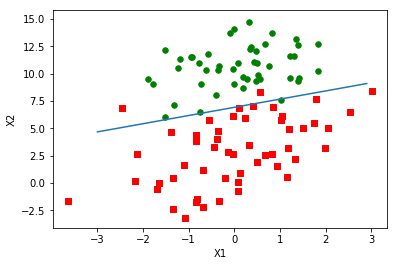

In [12]:
plotBestFit(weights,xMat,lMat)